In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt


In [ ]:
#generate 2 class dataset
X,y = make_classification(n_samples = 1000, n_classes = 2, random_state=1)

In [3]:
##split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#generate a no skill prediction (majority class)
#create a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [6]:
##Prediction based on probability
model_prob = model.predict_proba(X_test)

In [7]:
model_prob

array([[9.58775327e-04, 9.99041225e-01],
       [9.03113399e-01, 9.68866009e-02],
       [5.10627964e-01, 4.89372036e-01],
       [1.89953026e-01, 8.10046974e-01],
       [8.87573193e-01, 1.12426807e-01],
       [5.60127995e-01, 4.39872005e-01],
       [1.70539186e-01, 8.29460814e-01],
       [2.86177560e-01, 7.13822440e-01],
       [1.12292117e-01, 8.87707883e-01],
       [1.32026145e-01, 8.67973855e-01],
       [9.99456145e-01, 5.43854787e-04],
       [1.68799639e-01, 8.31200361e-01],
       [8.08969781e-01, 1.91030219e-01],
       [4.60946921e-01, 5.39053079e-01],
       [2.71939746e-01, 7.28060254e-01],
       [1.76492952e-01, 8.23507048e-01],
       [6.14129577e-02, 9.38587042e-01],
       [3.61632696e-01, 6.38367304e-01],
       [8.89840189e-01, 1.10159811e-01],
       [7.58965653e-01, 2.41034347e-01],
       [9.88414268e-01, 1.15857322e-02],
       [5.09845298e-01, 4.90154702e-01],
       [1.11914893e-01, 8.88085107e-01],
       [2.05189797e-03, 9.97948102e-01],
       [8.630545

In [8]:
#focus on the positive outcome probabilities
model_prob_positive_outcome = model_prob[:,1]

In [9]:
model_prob_positive_outcome

array([9.99041225e-01, 9.68866009e-02, 4.89372036e-01, 8.10046974e-01,
       1.12426807e-01, 4.39872005e-01, 8.29460814e-01, 7.13822440e-01,
       8.87707883e-01, 8.67973855e-01, 5.43854787e-04, 8.31200361e-01,
       1.91030219e-01, 5.39053079e-01, 7.28060254e-01, 8.23507048e-01,
       9.38587042e-01, 6.38367304e-01, 1.10159811e-01, 2.41034347e-01,
       1.15857322e-02, 4.90154702e-01, 8.88085107e-01, 9.97948102e-01,
       1.36945498e-01, 1.32643249e-02, 6.45087847e-01, 9.69507009e-01,
       3.99070556e-02, 2.38152731e-02, 3.69213417e-01, 3.40314906e-02,
       2.29858043e-01, 9.57101721e-01, 5.44958479e-01, 6.56791269e-01,
       1.52123558e-02, 2.93410161e-02, 7.80393330e-01, 2.99088014e-02,
       9.28398422e-01, 8.43395917e-01, 1.60117892e-02, 5.78395703e-04,
       6.61496895e-02, 6.69762422e-02, 9.97948178e-01, 6.55755704e-01,
       8.94036983e-01, 6.07000680e-02, 2.10340754e-02, 3.23954283e-02,
       1.03560315e-01, 5.44021349e-02, 5.64730236e-01, 9.87033757e-01,
      

In [10]:
#Calculate the scores
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob_positive_outcome)

In [11]:
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [12]:
dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,_=roc_curve(y_test,model_prob_positive_outcome)

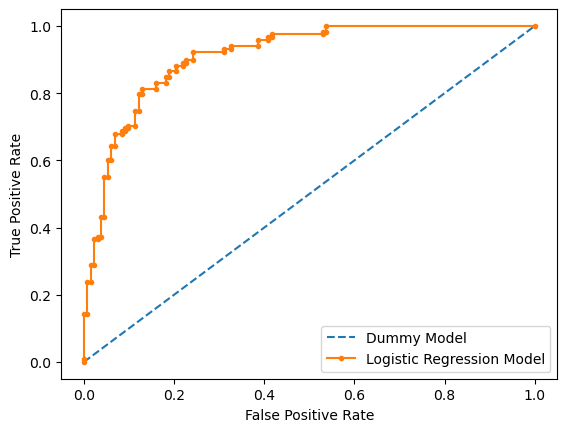

In [13]:
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr, marker='.',label='Logistic Regression Model')
#axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend()
#show the plot
plt.show()


In [14]:
dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,threshold=roc_curve(y_test,model_prob_positive_outcome)

In [15]:
threshold

array([           inf, 9.99738397e-01, 9.87033757e-01, 9.86362468e-01,
       9.57744551e-01, 9.57101721e-01, 9.45385188e-01, 9.40463485e-01,
       9.28300276e-01, 9.27356342e-01, 9.25607881e-01, 9.23728474e-01,
       8.94744248e-01, 8.94036983e-01, 8.43395917e-01, 8.38396411e-01,
       8.28791784e-01, 8.26684852e-01, 8.08489957e-01, 8.06352720e-01,
       7.80393330e-01, 7.63976766e-01, 7.63705186e-01, 7.63537905e-01,
       7.58496683e-01, 7.55347574e-01, 7.52623720e-01, 7.48020931e-01,
       7.23488083e-01, 7.23238629e-01, 6.74619385e-01, 6.56791269e-01,
       6.55162225e-01, 6.26882105e-01, 5.99962989e-01, 5.57931518e-01,
       5.39053079e-01, 5.14219160e-01, 5.05342549e-01, 4.96278090e-01,
       4.90154702e-01, 4.85201910e-01, 4.69275954e-01, 4.50983178e-01,
       4.46563018e-01, 4.39872005e-01, 4.24245353e-01, 3.24715881e-01,
       3.12906913e-01, 3.06694053e-01, 3.01325247e-01, 2.10358834e-01,
       2.06296724e-01, 1.91030219e-01, 1.69877066e-01, 1.42771985e-01,
      

C:\Users\himan\AppData\Local\Temp\ipykernel_13544\1611669861.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


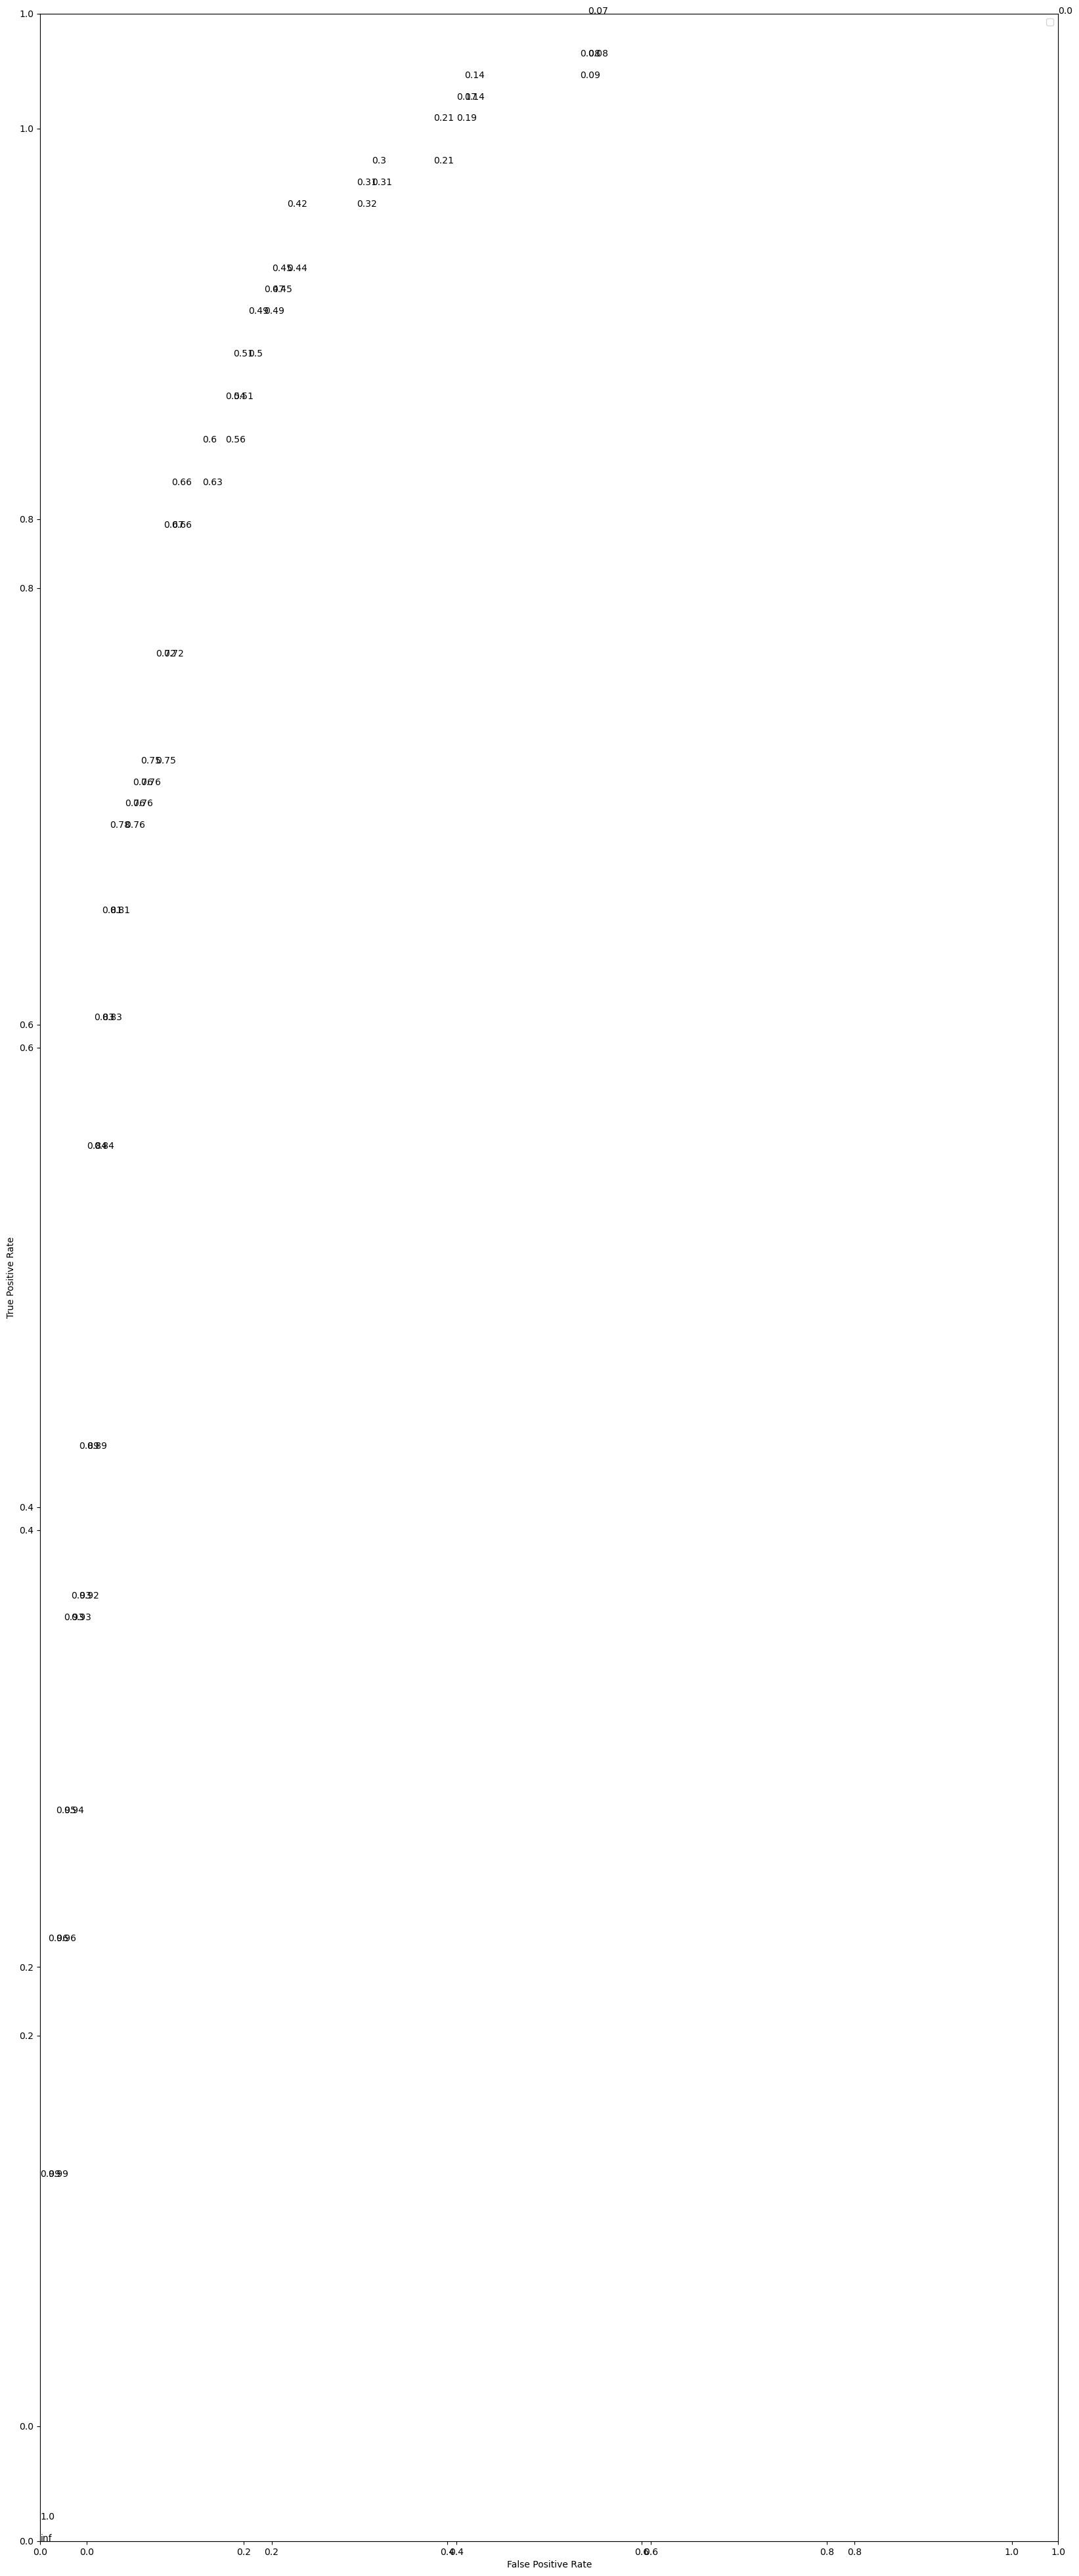

In [18]:
import numpy as np
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic Regression Model')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,threshold):
    ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1])) 
#axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend()
#show the plot
plt.show()
